In [1]:
did = False
if not did:
    %cd ..
    did = True

/Users/adsurbum/projects/univer/EffectiveNPI/src


In [2]:
%load_ext autoreload
%autoreload
exec(open("plot_utils.py").read())

/Users/adsurbum/anaconda2/envs/py371/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import os,fnmatch

def calc_stats(countries,dir_name):
    dic_arr = []
    loglik_arr = []
    lnprobs = []
    for country_name in countries:
        load_data(dir_name+country_name+'.npz',country_name)
        dic_arr.append(calc_DIC())
        loglik_arr.append(calc_LoglikMAP())
        lnprobs.append(lnprobability.mean())
    return dic_arr,loglik_arr,lnprobs

def plot_diff(countries,arr1,arr2,label):
    dic_diff = np.array(round_list(np.array(arr1)-np.array(arr2)))
    countries = np.array(countries)
    s = dic_diff.argsort()
    dic_diff = dic_diff[s]
    countries = countries[s]

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(dic_diff,countries,'ok');
    ax.plot(dic_diff[dic_diff>=6],countries[dic_diff>=6],'ok',color='red');
    ax.plot(dic_diff[dic_diff<=-6],countries[dic_diff<=-6],'ok',color='blue');
    ax.hlines(countries[dic_diff<0],dic_diff[dic_diff<0],0,color='blue')
    ax.hlines(countries[dic_diff>=0],dic_diff[dic_diff>=0],0,color='red')
    ax.set(
        xlabel=label,
    )
    plt.axvline(0, ls='--', color='k')
    sns.despine()
    plt.tight_layout()
    print(list(zip(countries,dic_diff)))

In [5]:
dir_name = '../{}/{}/inference/'.format('output','2020-04-29-prior-walkers-autocorr-model1-uniform')
countries = [a[:-4] for a in fnmatch.filter(os.listdir(dir_name), '*.npz')]

In [6]:
%%time
dir_name = '../{}/{}/inference/'.format('output','2020-04-29-prior-walkers-autocorr-model1-uniform')
uni = calc_stats(countries,dir_name)

CPU times: user 15.6 s, sys: 3.43 s, total: 19 s
Wall time: 21.3 s


In [7]:
%%time
dir_name = '../{}/{}/inference/'.format('output','2020-04-30-prior-walkers-model2-normal')
norm = calc_stats(countries,dir_name)

CPU times: user 15.5 s, sys: 3.34 s, total: 18.9 s
Wall time: 21.2 s


In [8]:
def round_list(lst):
    return [round(v,1) for v in lst]

[('Sweden', -177.6, -361.6),
 ('Belgium', -460.6, -444.9),
 ('United_Kingdom', -989.7, -1150.7),
 ('Switzerland', -947.9, -1380.0),
 ('Wuhan', -636.3, -306.4),
 ('Germany', -3310.0, -2925.5),
 ('Austria', -795.2, -794.9),
 ('Spain', -1470.3, -2605.0),
 ('France', -1082.2, -1108.6),
 ('Italy', -792.8, -1230.0),
 ('Denmark', -224.8, -221.6),
 ('Norway', -427.4, -327.6)]

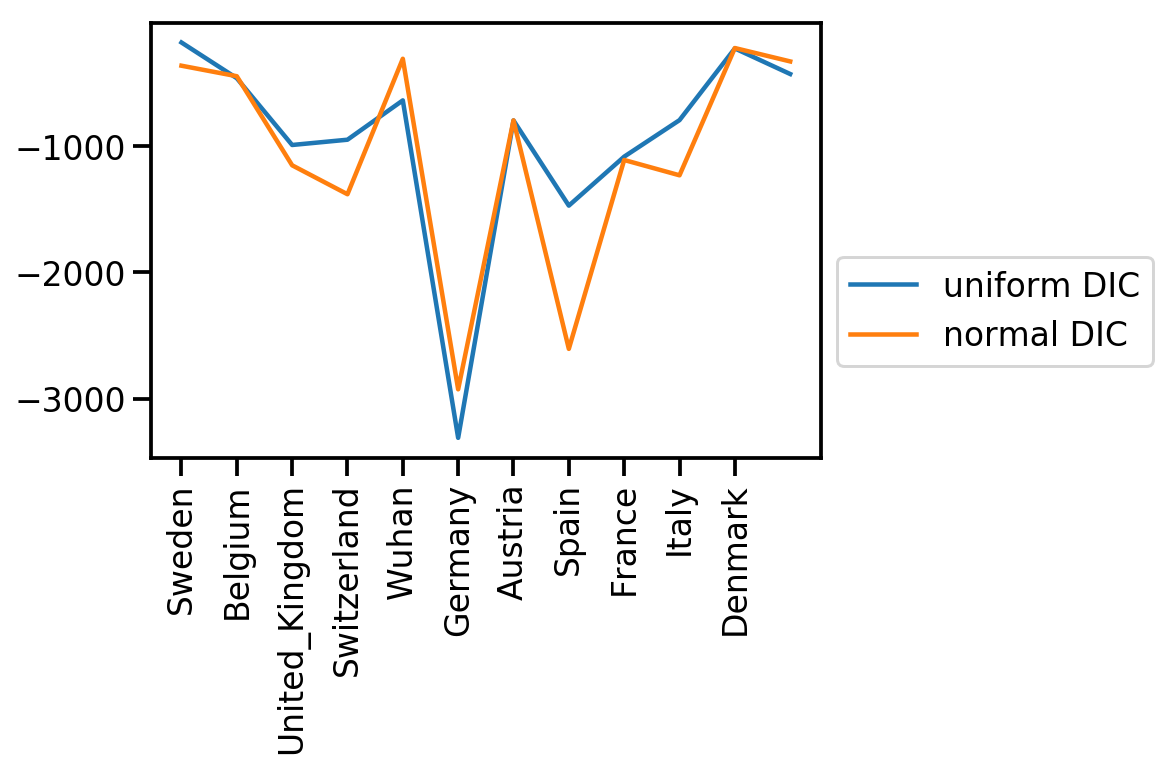

In [9]:
import matplotlib.pyplot as plt
plt.plot(uni[0],label='uniform DIC')
plt.plot(norm[0],label='normal DIC')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);
list(zip(countries,round_list(uni[0]),round_list(norm[0])))

[('Sweden', -117.6, -211.0),
 ('Belgium', -263.8, -256.4),
 ('United_Kingdom', -534.8, -630.6),
 ('Switzerland', -550.6, -769.7),
 ('Wuhan', -394.6, -231.3),
 ('Germany', -1842.6, -1647.5),
 ('Austria', -430.6, -430.2),
 ('Spain', -808.9, -1390.0),
 ('France', -595.4, -607.8),
 ('Italy', -642.2, -868.6),
 ('Denmark', -154.4, -153.2),
 ('Norway', -251.7, -204.8)]

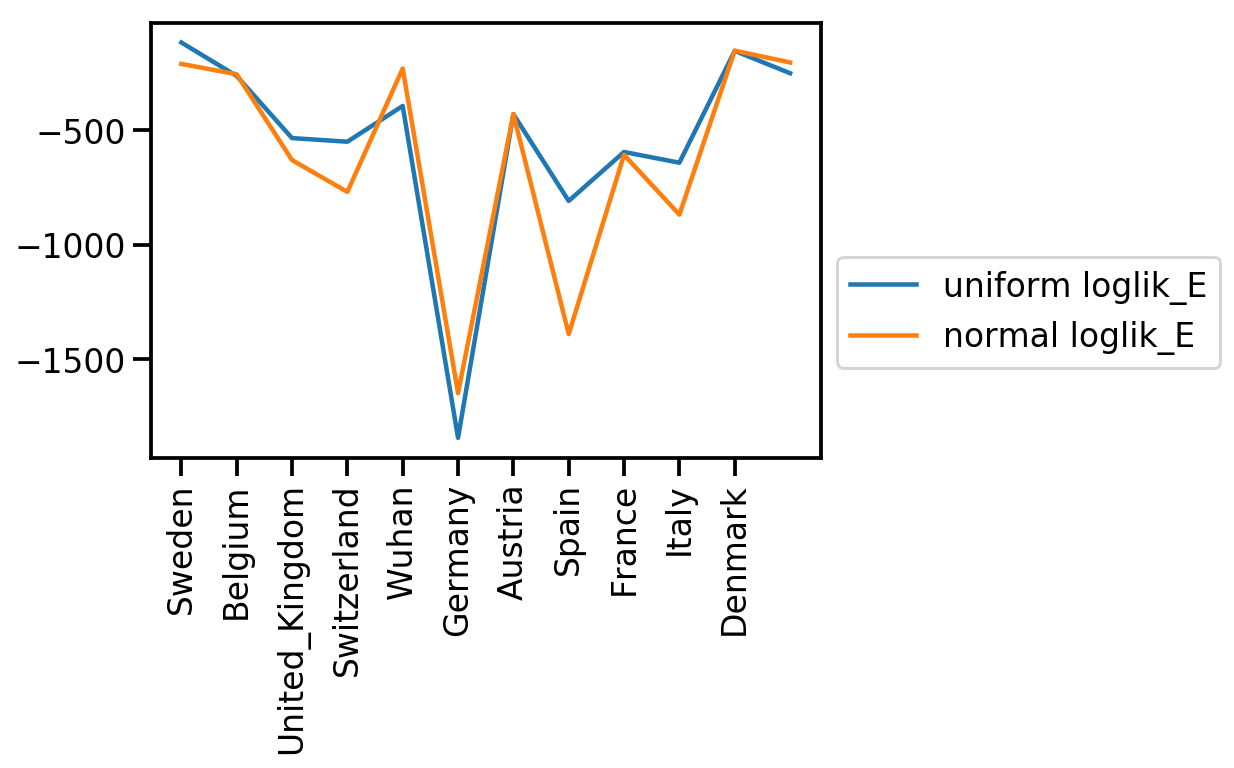

In [10]:
import matplotlib.pyplot as plt
plt.plot(uni[1],label='uniform loglik_E')
plt.plot(norm[1],label='normal loglik_E')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);
list(zip(countries,[round(v,1) for v in uni[1]],[round(v,1) for v in norm[1]]))

[('Sweden', -14.4, -15.1),
 ('Belgium', -16.8, -17.0),
 ('United_Kingdom', -20.0, -27.6),
 ('Switzerland', -38.3, -39.9),
 ('Wuhan', -38.2, -39.0),
 ('Germany', -93.8, -92.4),
 ('Austria', -16.5, -16.4),
 ('Spain', -36.9, -43.7),
 ('France', -27.1, -26.8),
 ('Italy', -122.9, -126.8),
 ('Denmark', -21.0, -21.2),
 ('Norway', -19.0, -20.5)]

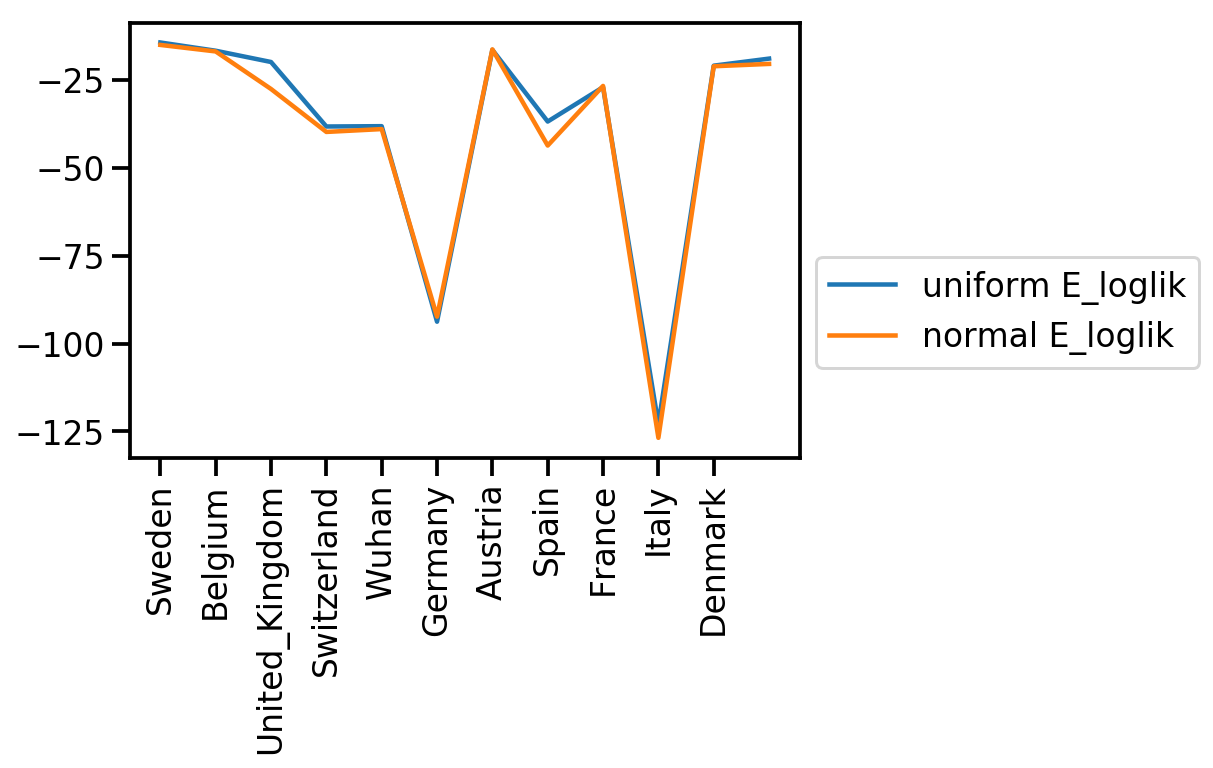

In [11]:
import matplotlib.pyplot as plt
plt.plot(uni[2],label='uniform E_loglik')
plt.plot(norm[2],label='normal E_loglik')
plt.legend(bbox_to_anchor=(1, 0.5));
plt.xticks(np.arange(11),countries,rotation=90);
list(zip(countries,[round(v,1) for v in uni[2]],[round(v,1) for v in norm[2]]))

[('Spain', -1134.7), ('Italy', -437.1), ('Switzerland', -432.0), ('Sweden', -184.0), ('United_Kingdom', -161.0), ('France', -26.3), ('Austria', 0.3), ('Denmark', 3.1), ('Belgium', 15.7), ('Norway', 99.8), ('Wuhan', 329.9), ('Germany', 384.5)]


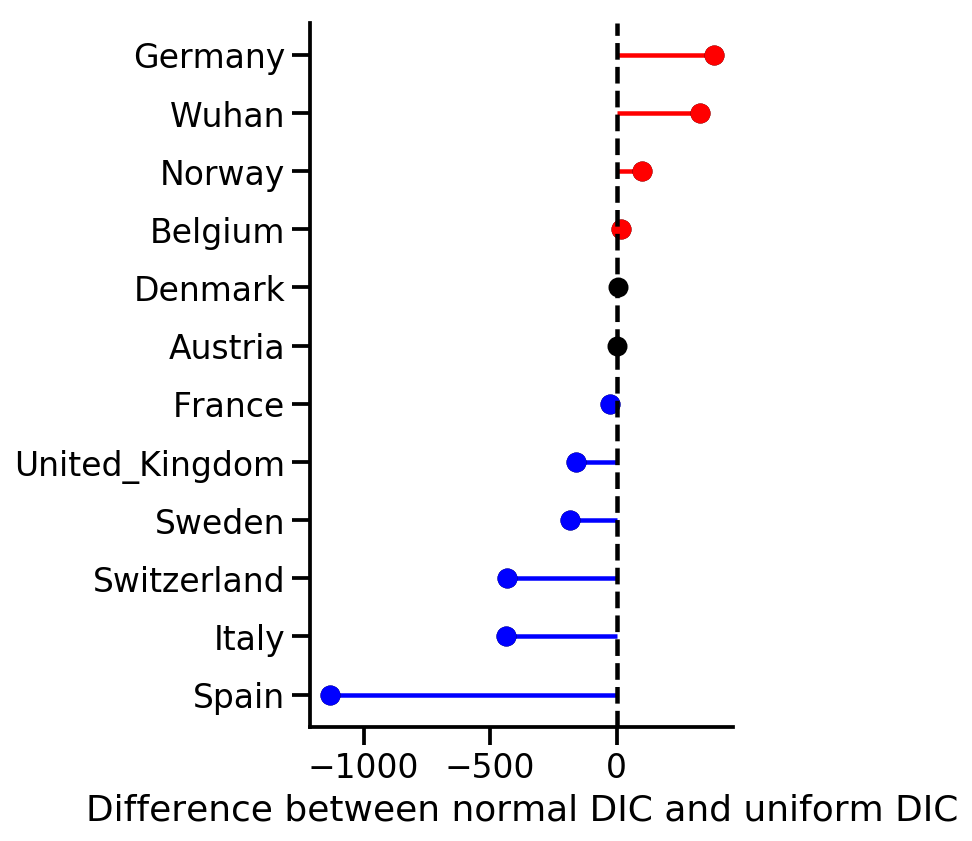

In [12]:
plot_diff(countries, norm[0], uni[0], 'Difference between normal DIC and uniform DIC')

[('Spain', -581.0), ('Italy', -226.5), ('Switzerland', -219.1), ('United_Kingdom', -95.8), ('Sweden', -93.4), ('France', -12.5), ('Austria', 0.4), ('Denmark', 1.2), ('Belgium', 7.4), ('Norway', 46.9), ('Wuhan', 163.3), ('Germany', 195.1)]


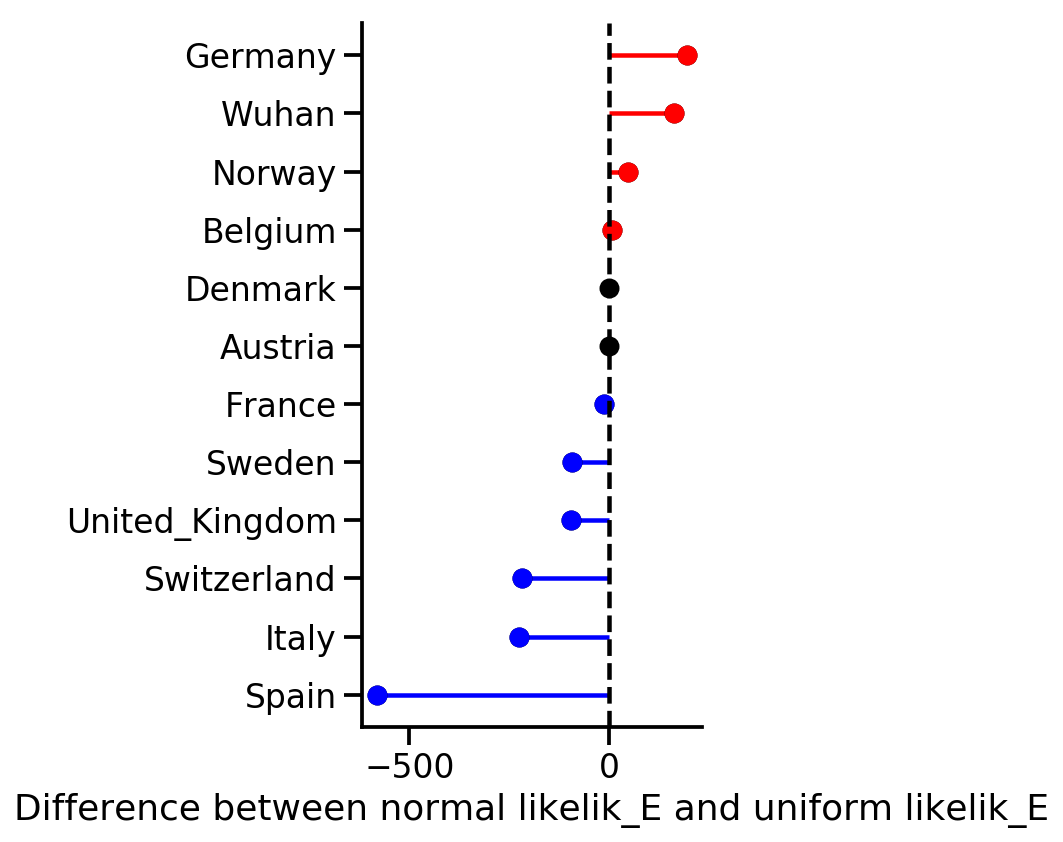

In [13]:
plot_diff(countries, norm[1], uni[1], 'Difference between normal likelik_E and uniform likelik_E')

[('United_Kingdom', -7.7), ('Spain', -6.8), ('Italy', -3.9), ('Switzerland', -1.5), ('Norway', -1.5), ('Wuhan', -0.8), ('Sweden', -0.7), ('Belgium', -0.2), ('Denmark', -0.2), ('Austria', 0.1), ('France', 0.4), ('Germany', 1.4)]


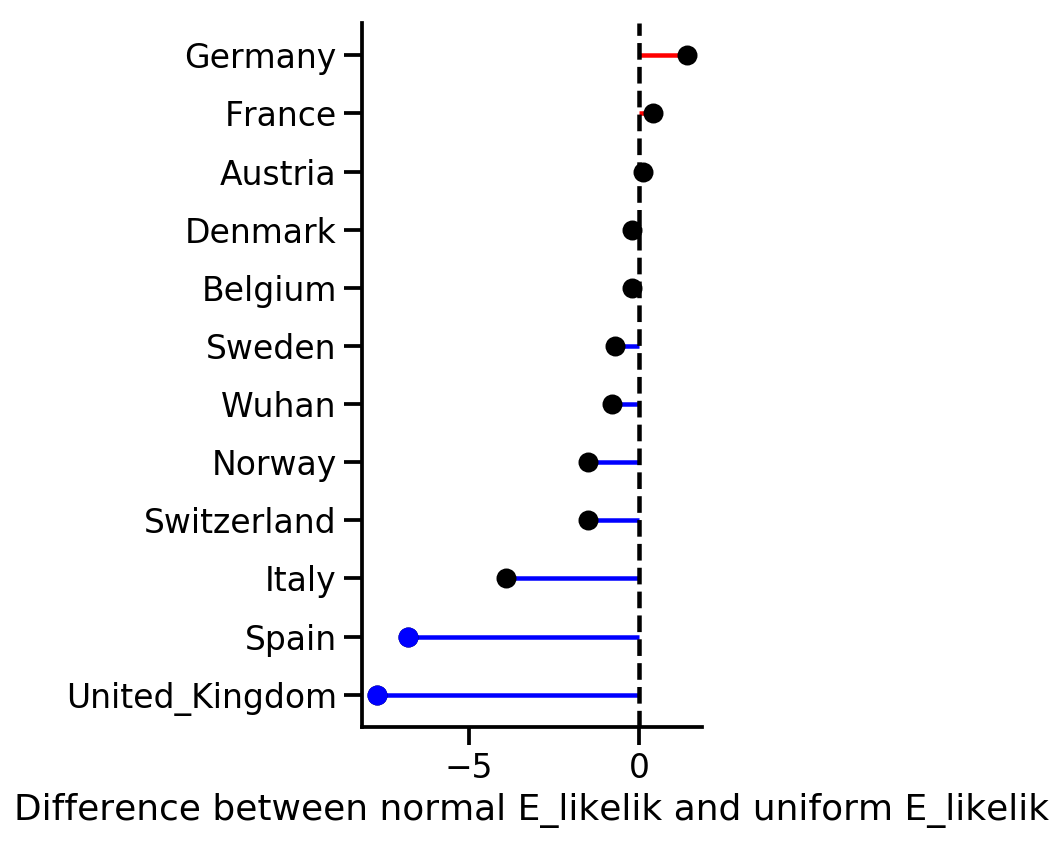

In [14]:
plot_diff(countries, norm[2], uni[2], 'Difference between normal E_likelik and uniform E_likelik')

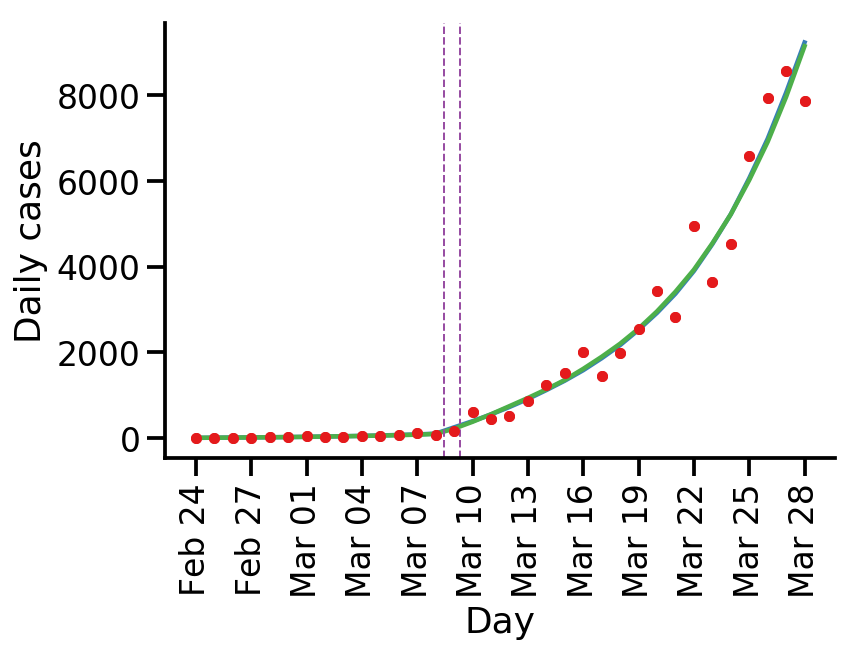

In [15]:
dir_name = '../{}/{}/inference/'.format('output','2020-04-29-prior-walkers-autocorr-model1-uniform')
load_data(dir_name+'Spain'+'.npz','Spain')
ax = plot_incidences()
dir_name = '../{}/{}/inference/'.format('output','2020-04-30-prior-walkers-model2-normal')
load_data(dir_name+'Spain'+'.npz','Spain')
plot_incidences(ax,color=green)


In [ ]:
dir_name = '../{}/{}/inference/'.format('output','2020-04-29-prior-walkers-autocorr-model1-uniform')
load_data(dir_name+'Spain'+'.npz','United K')
ax = plot_incidences()
dir_name = '../{}/{}/inference/'.format('output','2020-04-30-prior-walkers-model2-normal')
load_data(dir_name+'Spain'+'.npz','Spain')
plot_incidences(ax,color=green)